## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [10]:
import os
import keras
from keras.layers import Dense,Input
from keras.models import Model
from keras import optimizers

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [7]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layers = Input([x_train.shape[-1]])
    x = Dense(units = 512 , activation = 'relu')(input_layers)
    x = Dense(units = 256 , activation = 'relu')(x)
    x = Dense(units = 128 , activation = 'relu')(x)
    out = Dense(units = 10 , activation = 'softmax')(x)
    model = Model(inputs = [input_layers] , outputs = [out])

    return model


model = build_mlp()

In [11]:
"""
Compile 模型
"""
sgd = optimizers.SGD(lr = 0.01)
model.compile(loss = 'categorical_crossentropy' , optimizer = 'sgd' , metrics = ['accuracy'])

In [12]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 59us/step - loss: 2.0666 - accuracy: 0.2558 - val_loss: 1.9516 - val_accuracy: 0.3146
Epoch 2/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.8826 - accuracy: 0.3389 - val_loss: 1.8367 - val_accuracy: 0.3575
Epoch 3/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.8104 - accuracy: 0.3616 - val_loss: 1.8411 - val_accuracy: 0.3364
Epoch 4/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.7653 - accuracy: 0.3779 - val_loss: 1.7764 - val_accuracy: 0.3706
Epoch 5/500
50000/50000 [==============================] - 2s 50us/step - loss: 1.7286 - accuracy: 0.3919 - val_loss: 1.7508 - val_accuracy: 0.3791
Epoch 6/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.6988 - accuracy: 0.4042 - val_loss: 1.7147 - val_accuracy: 0.3895
Epoch 7/500
50000/50000 [==============================] - 3s 

Epoch 56/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.1889 - accuracy: 0.5831 - val_loss: 1.4498 - val_accuracy: 0.4893
Epoch 57/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.1813 - accuracy: 0.5863 - val_loss: 1.4517 - val_accuracy: 0.4879
Epoch 58/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.1800 - accuracy: 0.5842 - val_loss: 1.3592 - val_accuracy: 0.5122
Epoch 59/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.1803 - accuracy: 0.5850 - val_loss: 1.4975 - val_accuracy: 0.4673
Epoch 60/500
50000/50000 [==============================] - 3s 52us/step - loss: 1.1686 - accuracy: 0.5884 - val_loss: 1.3736 - val_accuracy: 0.5208
Epoch 61/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.1619 - accuracy: 0.5928 - val_loss: 1.4000 - val_accuracy: 0.5086
Epoch 62/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.1566 - accuracy: 0.5948

Epoch 111/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.9002 - accuracy: 0.6867 - val_loss: 1.4379 - val_accuracy: 0.5104
Epoch 112/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.8846 - accuracy: 0.6939 - val_loss: 1.3753 - val_accuracy: 0.5362
Epoch 113/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.8848 - accuracy: 0.6925 - val_loss: 1.4805 - val_accuracy: 0.5113
Epoch 114/500
50000/50000 [==============================] - 3s 50us/step - loss: 0.8778 - accuracy: 0.6966 - val_loss: 1.5367 - val_accuracy: 0.4866
Epoch 115/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.8730 - accuracy: 0.6999 - val_loss: 1.4218 - val_accuracy: 0.5300
Epoch 116/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.8650 - accuracy: 0.6996 - val_loss: 1.3509 - val_accuracy: 0.5394
Epoch 117/500
50000/50000 [==============================] - 3s 50us/step - loss: 0.8611 - accuracy:

50000/50000 [==============================] - 3s 50us/step - loss: 0.6153 - accuracy: 0.7904 - val_loss: 1.4920 - val_accuracy: 0.5393
Epoch 166/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.6179 - accuracy: 0.7887 - val_loss: 1.8777 - val_accuracy: 0.4513
Epoch 167/500
50000/50000 [==============================] - 3s 50us/step - loss: 0.6014 - accuracy: 0.7971 - val_loss: 1.7603 - val_accuracy: 0.4954
Epoch 168/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.6026 - accuracy: 0.7956 - val_loss: 1.5293 - val_accuracy: 0.5222
Epoch 169/500
50000/50000 [==============================] - 3s 50us/step - loss: 0.6047 - accuracy: 0.7962 - val_loss: 1.8268 - val_accuracy: 0.4734
Epoch 170/500
50000/50000 [==============================] - 3s 50us/step - loss: 0.5861 - accuracy: 0.8023 - val_loss: 1.9042 - val_accuracy: 0.4686
Epoch 171/500
50000/50000 [==============================] - 3s 50us/step - loss: 0.5948 - accuracy: 0.7997 - val_

Epoch 220/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.3710 - accuracy: 0.8806 - val_loss: 1.8742 - val_accuracy: 0.5163
Epoch 221/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.3493 - accuracy: 0.8898 - val_loss: 1.8284 - val_accuracy: 0.5221
Epoch 222/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.3739 - accuracy: 0.8829 - val_loss: 1.9773 - val_accuracy: 0.5094
Epoch 223/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.3421 - accuracy: 0.8923 - val_loss: 1.7947 - val_accuracy: 0.5311
Epoch 224/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.3702 - accuracy: 0.8834 - val_loss: 1.7854 - val_accuracy: 0.5361
Epoch 225/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.3369 - accuracy: 0.8932 - val_loss: 3.3126 - val_accuracy: 0.4085
Epoch 226/500
50000/50000 [==============================] - 3s 50us/step - loss: 0.4349 - accuracy:

50000/50000 [==============================] - 3s 50us/step - loss: 0.1661 - accuracy: 0.9572 - val_loss: 2.9235 - val_accuracy: 0.4943
Epoch 275/500
50000/50000 [==============================] - 3s 50us/step - loss: 0.2395 - accuracy: 0.9363 - val_loss: 2.1534 - val_accuracy: 0.5342
Epoch 276/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.1615 - accuracy: 0.9573 - val_loss: 2.2204 - val_accuracy: 0.5244
Epoch 277/500
50000/50000 [==============================] - 3s 50us/step - loss: 0.1936 - accuracy: 0.9472 - val_loss: 2.1972 - val_accuracy: 0.5338
Epoch 278/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.1680 - accuracy: 0.9580 - val_loss: 2.2715 - val_accuracy: 0.5286
Epoch 279/500
50000/50000 [==============================] - 3s 50us/step - loss: 0.1300 - accuracy: 0.9693 - val_loss: 2.1500 - val_accuracy: 0.5403
Epoch 280/500
50000/50000 [==============================] - 3s 50us/step - loss: 0.2059 - accuracy: 0.9475 - val_

Epoch 329/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.0563 - accuracy: 0.9926 - val_loss: 2.5171 - val_accuracy: 0.5371
Epoch 330/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.0547 - accuracy: 0.9926 - val_loss: 2.4693 - val_accuracy: 0.5325
Epoch 331/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.0513 - accuracy: 0.9940 - val_loss: 2.4778 - val_accuracy: 0.5406
Epoch 332/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.0509 - accuracy: 0.9937 - val_loss: 2.6256 - val_accuracy: 0.5246
Epoch 333/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.0527 - accuracy: 0.9930 - val_loss: 2.5602 - val_accuracy: 0.5301
Epoch 334/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.0542 - accuracy: 0.9923 - val_loss: 4.8983 - val_accuracy: 0.4039
Epoch 335/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.5443 - accuracy:

50000/50000 [==============================] - 2s 50us/step - loss: 0.0351 - accuracy: 0.9972 - val_loss: 2.6618 - val_accuracy: 0.5417
Epoch 384/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.0302 - accuracy: 0.9979 - val_loss: 2.7075 - val_accuracy: 0.5390
Epoch 385/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0265 - accuracy: 0.9984 - val_loss: 2.7958 - val_accuracy: 0.5254
Epoch 386/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.0251 - accuracy: 0.9988 - val_loss: 2.7932 - val_accuracy: 0.5418
Epoch 387/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.0237 - accuracy: 0.9987 - val_loss: 2.7357 - val_accuracy: 0.5460
Epoch 388/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0229 - accuracy: 0.9989 - val_loss: 2.8104 - val_accuracy: 0.5333
Epoch 389/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0228 - accuracy: 0.9987 - val_

Epoch 438/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0106 - accuracy: 0.9999 - val_loss: 3.0237 - val_accuracy: 0.5455
Epoch 439/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.0108 - accuracy: 0.9997 - val_loss: 3.0181 - val_accuracy: 0.5450
Epoch 440/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0103 - accuracy: 0.9999 - val_loss: 3.0352 - val_accuracy: 0.5417
Epoch 441/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0101 - accuracy: 0.9999 - val_loss: 3.0271 - val_accuracy: 0.5476
Epoch 442/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0100 - accuracy: 0.9999 - val_loss: 3.0306 - val_accuracy: 0.5478
Epoch 443/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 3.0373 - val_accuracy: 0.5480
Epoch 444/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0097 - accuracy:

50000/50000 [==============================] - 2s 48us/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 3.2320 - val_accuracy: 0.5457
Epoch 493/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 3.2339 - val_accuracy: 0.5456
Epoch 494/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 3.2422 - val_accuracy: 0.5452
Epoch 495/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 3.2486 - val_accuracy: 0.5463
Epoch 496/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 3.2464 - val_accuracy: 0.5434
Epoch 497/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 3.2453 - val_accuracy: 0.5443
Epoch 498/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0058 - accuracy: 1.0000 - val_

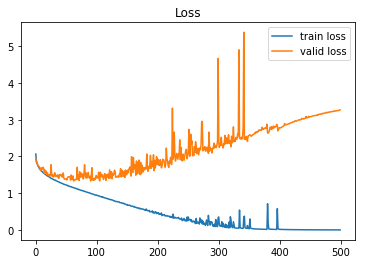

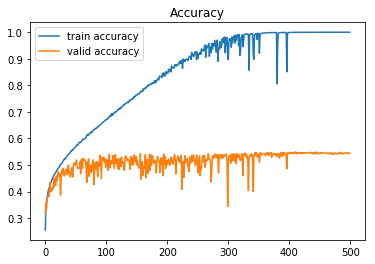

In [14]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()